# i. Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

---

#### *Graded Challenge 7*

**Nama**      : Noufal Rifata Reyhan

**Batch**     : HCK-009

**Objective** : Untuk klasifikasi gambar, di mana model belajar untuk mengenali dan memberikan label pada objek-objek dalam gambar.

---

# ii. Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [22]:
import glob
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import imshow
from matplotlib.image import imread
from PIL import Image
from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16, ResNet50, EfficientNetV2B0, MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Optimizer, Adam
from tensorflow.keras.utils import load_img
from PIL import Image
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')
print('Berhasil Mengimport Libraries')


Berhasil Mengimport Libraries


# iii. Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [3]:
test_files = glob.glob('cards/test/')
train_files = glob.glob('cards/train/')

for te in test_files:
  num = te.split('/')[-1].split('_')[0]
  os.rename(te,f'CATS&DOGS/test/cats{num}.jpg')
for tr in train_files:
  num = tr.split('/')[-1].split('_')[0]
  os.rename(tr,f'CATS&DOGS/train/dogs{num}.jpg')

In [10]:
import os

animal_path = {
    'cats': 'train/cats',
    'dogs': 'train/dogs',
}

base_path = 'CATS&DOGS'

for species, path in animal_path.items():
    full_path = os.path.join(base_path, path)
    class_count = len(os.listdir(full_path))
    print(f'There are {class_count} images of {species} in the data')

There are 279 images of cats in the data
There are 278 images of dogs in the data


In [12]:
import os

animal_path = {
    'cats': 'test/cats',
    'dogs': 'test/dogs',
}

base_path = 'CATS&DOGS'

for species, path in animal_path.items():
    full_path = os.path.join(base_path, path)
    class_count = len(os.listdir(full_path))
    print(f'There are {class_count} images of {species} in the data')

There are 70 images of cats in the data
There are 70 images of dogs in the data


In [13]:
IMG_SIZE = 400
path = 'CATS&DOGS/train/'

datagen = tf.keras.preprocessing.image.ImageDataGenerator()
#class_mode = categorical for multiclass
data = datagen.flow_from_directory(path, (IMG_SIZE, IMG_SIZE), batch_size=32, class_mode='binary', shuffle=True) 

Found 557 images belonging to 2 classes.


# iV. Exploratory Data Analysis (EDA)

> Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

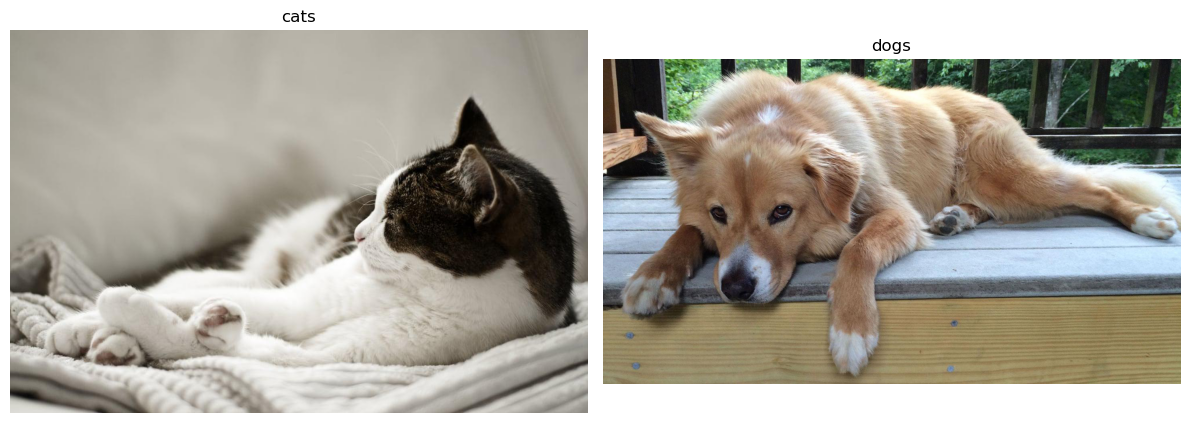

In [35]:
def show_image(ax, image):
    img_paths = glob.glob(os.path.join(train_path, image, '*'))
    if img_paths:
        i = np.random.randint(len(img_paths))
        img = Image.open(img_paths[i])
        ax.imshow(img)
        ax.set_title(image)
        ax.axis('off')  

fig, ax = plt.subplots(1, 2, figsize=(12, 8))

# Assuming train_path is defined earlier
train_path = 'CATS&DOGS\\train'  # Use double backslashes to avoid escape characters

show_image(ax[0], 'cats')
show_image(ax[1], 'dogs')

plt.tight_layout()
plt.show()

# V. Feature Engineering

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-val-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [15]:
train_datagen = ImageDataGenerator(
    
    rescale=1./255.,
    # Horizontal flipping
    horizontal_flip=True,       
    # Vertical flipping
    vertical_flip=True,         
    # Rotate image counter-clockwise and clockwise up to 90 degrees
    rotation_range=90,          
    # Randomly darken or lighten images
    brightness_range=[0.2, 1.0], 
    # Apply shearing transformation
    shear_range=0.2,            
    # Shift images horizontally
    width_shift_range=0.2,      
    # Shift images vertically
    height_shift_range=0.2,     
    # Zoom images
    zoom_range=0.2             
)

test_datagen = ImageDataGenerator(rescale=1./255.)

In [17]:
train_gen = train_datagen.flow_from_directory(
    "CATS&DOGS/train",
    target_size=(150, 150),
    class_mode='binary',
    batch_size=32,
    shuffle=True
)

test_gen = test_datagen.flow_from_directory(
    "CATS&DOGS/test",
    target_size=(150, 150),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)


Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [18]:
print(train_gen.class_indices)

{'cats': 0, 'dogs': 1}


# Vi. Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [20]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(150, 150, 3))),
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(tf.keras.layers.Conv2D(128, (3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 36, 36, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)      

### **VGG16**

In [24]:
# Buat model VGG16 tanpa lapisan output terakhir
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Bekukan lapisan-lapisan di VGG16 agar tidak dapat dilatih lagi
for layer in base_model.layers:
    layer.trainable = False

# Tambahkan lapisan-lapisan yang Anda definisikan sebelumnya setelah VGG16
model1 = models.Sequential()
model1.add(base_model)
model1.add(layers.GlobalAveragePooling2D())
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model1.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

58889256/58889256 [==============================] - 36s 1us/step


In [25]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_2  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14977857 (57.14 MB)
Trainable params: 263169 (1.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________

# Vii. Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [26]:
# Checkpointing and early stopping
callbacks1= [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('model_check.h5', save_best_only= True )
]

In [30]:
# model
history = model.fit(train_gen, epochs= 50, validation_data=test_gen, verbose=1)

Epoch 1/50
18/18 [==============================] - 14s 788ms/step - loss: 0.6950 - accuracy: 0.4937 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 2/50
18/18 [==============================] - 10s 586ms/step - loss: 0.6973 - accuracy: 0.5063 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 3/50
18/18 [==============================] - 10s 540ms/step - loss: 0.6929 - accuracy: 0.5350 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 4/50
18/18 [==============================] - 10s 535ms/step - loss: 0.6917 - accuracy: 0.5512 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 5/50
18/18 [==============================] - 16s 933ms/step - loss: 0.6909 - accuracy: 0.5296 - val_loss: 0.6881 - val_accuracy: 0.5714
Epoch 6/50
18/18 [==============================] - 12s 646ms/step - loss: 0.6899 - accuracy: 0.5386 - val_loss: 0.6939 - val_accuracy: 0.5357
Epoch 7/50
18/18 [==============================] - 10s 561ms/step - loss: 0.6891 - accuracy: 0.5224 - val_loss: 0.6951 - val_accuracy: 0.5071

### **VGG16**

In [31]:
# model1
history1 = model1.fit(train_gen, epochs= 50, validation_data=test_gen, verbose=1)

Epoch 1/50
18/18 [==============================] - 37s 2s/step - loss: 0.7179 - accuracy: 0.5242 - val_loss: 0.6184 - val_accuracy: 0.6429
Epoch 2/50
18/18 [==============================] - 35s 2s/step - loss: 0.6825 - accuracy: 0.6014 - val_loss: 0.5853 - val_accuracy: 0.6857
Epoch 3/50
18/18 [==============================] - 41s 2s/step - loss: 0.6317 - accuracy: 0.6427 - val_loss: 0.5927 - val_accuracy: 0.6500
Epoch 4/50
18/18 [==============================] - 43s 2s/step - loss: 0.6389 - accuracy: 0.6391 - val_loss: 0.6004 - val_accuracy: 0.6429
Epoch 5/50
18/18 [==============================] - 49s 3s/step - loss: 0.6221 - accuracy: 0.6355 - val_loss: 0.5788 - val_accuracy: 0.6786
Epoch 6/50
18/18 [==============================] - 49s 3s/step - loss: 0.6015 - accuracy: 0.6661 - val_loss: 0.5713 - val_accuracy: 0.7000
Epoch 7/50
18/18 [==============================] - 49s 3s/step - loss: 0.6173 - accuracy: 0.6535 - val_loss: 0.5780 - val_accuracy: 0.7071
Epoch 8/50
18/18 [==

# Viii. Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

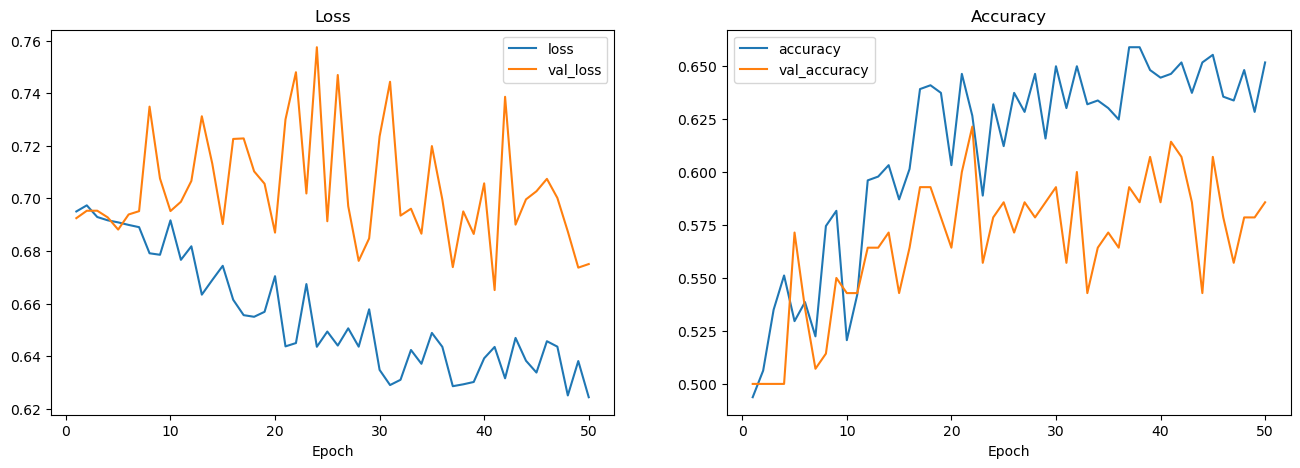

In [32]:
# history plot model
epoch = 50

fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
ax[0].plot(range(1, epoch + 1), history.history['loss'], label='loss')
ax[0].plot(range(1, epoch + 1), history.history['val_loss'], label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1, epoch + 1), history.history['accuracy'], label='accuracy')
ax[1].plot(range(1, epoch + 1), history.history['val_accuracy'], label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

### **VGG16**

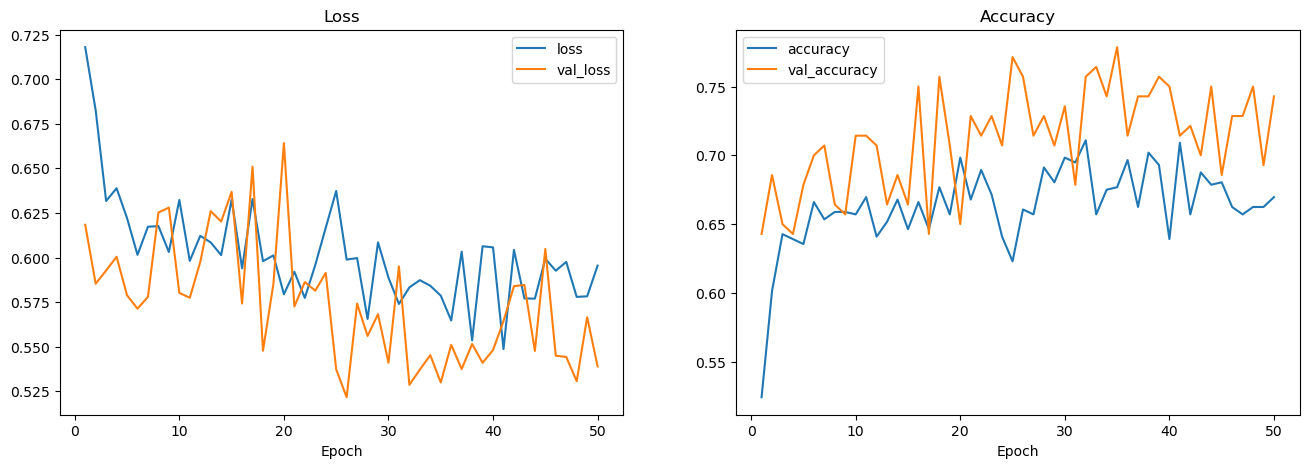

In [33]:
# Plot the training history
epoch = 50

fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
ax[0].plot(range(1, epoch + 1), history1.history['loss'], label='loss')
ax[0].plot(range(1, epoch + 1), history1.history['val_loss'], label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

# Check if validation data was used
if 'val_loss' in history1.history:
    val_length = len(history1.history['val_loss'])
    ax[1].plot(range(1, val_length + 1), history1.history['accuracy'][:val_length], label='accuracy')
    ax[1].plot(range(1, val_length + 1), history1.history['val_accuracy'], label='val_accuracy')
else:
    ax[1].plot(range(1, epoch + 1), history1.history['accuracy'], label='accuracy')

ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

# iX. Model Saving

> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. Pilihlah 1 arsitektur ANN yang terbaik berdasarkan hasil evaluasi sebelumnya.

In [34]:
model.save('model.h5')
model1.save('model1.h5')

# X. Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set, val-set, ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled. Model Inference harus berada pada notebook yang berbeda dari notebook yang dipakai untuk pembuatan model.

##### ***`SAYA MENGERJAKAN MODEL INFERENCE DI FILE YANG BERBEDA`***

# Xi. Pengambilan Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

*Dengan model CNN keakuratan yang didapatkan yaitu hanya 65% oleh karena itu saya melakukan improvment model dengan transfer learning menggunakan VGG16 dan didapatkan imprvement keakuratan menjadi 77%. Saya tidak melakukan improve lagi karena laptop saya tidak kuat lagi.*